<a href="https://colab.research.google.com/github/leticiaJFS/Projeto-Final-Semantix/blob/main/Projeto_Final_Semantix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Estou iniciando!!! Está incompleto.

# instalar as dependências
!apt-get update -qq
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
!pip install -q findspark

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [3]:
import findspark
findspark.init()

In [4]:
from pyspark.sql import SparkSession
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Criando uma sessão spark
spark = SparkSession.builder.appName("Projeto Final").getOrCreate()

In [6]:
#Conexão com drive para leitura do arquivo
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Leitura dos dados em CSV e gravação dos dados em parquet.
  #path = "/content/drive/MyDrive/Semantix/MICRODADOS_ENEM_2021.csv" 
  #dados = spark.read.csv(path, sep=';', inferSchema=True, header=True)

  #dados.write.parquet(
    #   path="/content/drive/MyDrive/Semantix/Parquet",
    #   mode="overwrite")

In [7]:
#Leitura dos dados em parquet com spark
dados_parquet = spark.read.parquet("/content/drive/MyDrive/Semantix/Parquet")

#Leitura dos dados em parquet com pandas
df = pd.read_parquet('/content/drive/MyDrive/Semantix/Parquet', engine='pyarrow')

In [ ]:
#Quantidade de registros
dados_parquet.count()

3389832

In [8]:
#Criando uma view para analisar os dados com SparkSQL
dados_parquet.createOrReplaceTempView("enem")

In [ ]:
#Todos os campos podem ser nulos

#Não há dados com numero de inscrição, ano, faixa etaria, sexo, estado civil, cor/raça, nacionalidade, situação conclusão EM, ano conclusão EM, tipo de escola EM, treineiro, 
    #  código município da prova,  nome do municipio da prova, codigo da UF da prova, sigla UF da prova, presença nas provas objvs, tipo lingua, nulos

#spark.sql("select * from enem a where a.nu_inscricao is null").show(5)
#spark.sql("select * from enem a where a.nu_ano is null").show(5)
#spark.sql("select * from enem a where a.tp_faixa_etaria is null").show(5)
#spark.sql("select * from enem a where a.tp_sexo is null").show(5)
#spark.sql("select * from enem a where a.tp_estado_civil is null").show(5)
#spark.sql("select * from enem a where a.tp_cor_raca is null").show(5)
#spark.sql("select * from enem a where a.tp_nacionalidade is null").show(5)
#spark.sql("select * from enem a where a.tp_st_conclusao is null").show(5)
#spark.sql("select * from enem a where a.tp_ano_concluiu is null").show(5)
#spark.sql("select * from enem a where a.tp_escola is null").show(5)
#spark.sql("select * from enem a where a.IN_TREINEIRO is null").show(5)
#spark.sql("select count(*) from enem a where a.CO_MUNICIPIO_PROVA is null").show()
#spark.sql("select count(*) from enem a where a.NO_MUNICIPIO_PROVA is null").show()
#spark.sql("select count(*) from enem a where a.CO_UF_PROVA is null").show()
#spark.sql("select count(*) from enem a where a.TP_PRESENCA_CN is null").show()
#spark.sql("select count(*) from enem a where a.TP_PRESENCA_CH is null").show()
#spark.sql("select count(*) from enem a where a.TP_PRESENCA_LC is null").show()
#spark.sql("select count(*) from enem a where a.TP_PRESENCA_MT is null").show()
#spark.sql("select count(*) from enem a where a.TP_LINGUA is null").show()

#Há dados nulos nas colunas tipo de instituição do EM (2293004), codigo municipio da escola (2576026), nome do município da escola (2576026), codigo da UF da escola (2576026), sigla UF da escola (2576026), 
    #dependencia administrativa da escola (2576026), localização da escola (25760226), situação de funcionamento da escola (2576026), codigo da prova CN (1143988), codigo da prova CH (1011453), 
    #código da prova LC (1011453), código da prova MT (1143988), Nota prova de CN(1143988), Nota prova de CH(1011453), Nota prova de LC(1011453), Nota prova de MT(1143988), respostas CN (1143988),
    #respostas CH (1011453), respostas LC (1011453), respostas MT (1143988), gabarito CN (1143988), gabarito CH (1011453), gabarito LC (1011453), gabarito MT (1143988), status redação (1011453),
    #nota competencia1 (1011453), nota competencia2 (1011453), nota competencia3 (1011453),  nota competencia4 (1011453), nota competencia5 (1011453), nota redação (1011453), Q001 a Q025 (2)

#spark.sql("select count(*) from enem a where a.TP_ENSINO is null").SHOW()
#spark.sql("select count(*) from enem a where a.CO_MUNICIPIO_ESC is null").show()
#spark.sql("select count(*) from enem a where a.CO_UF_ESC is null").show()
#spark.sql("select count(*) from enem a where a.SG_UF_ESC is null").show()
#spark.sql("select count(*) from enem a where a.TP_DEPENDENCIA_ADM_ESC is null").show()
#spark.sql("select count(*) from enem a where a.TP_LOCALIZACAO_ESC is null").show()
#spark.sql("select count(*) from enem a where a.TP_SIT_FUNC_ESC is null").show()
#spark.sql("select count(*) from enem a where a.CO_PROVA_CN is null").show()
#spark.sql("select count(*) from enem a where a.CO_PROVA_CH is null").show()
#spark.sql("select count(*) from enem a where a.CO_PROVA_LC is null").show()
#spark.sql("select count(*) from enem a where a.CO_PROVA_MT is null").show()
#spark.sql("select count(*) from enem a where a.NU_NOTA_CN is null").show()
#spark.sql("select count(*) from enem a where a.NU_NOTA_CH is null").show()
#spark.sql("select count(*) from enem a where a.NU_NOTA_LC is null").show()
#spark.sql("select count(*) from enem a where a.NU_NOTA_MT is null").show()
#spark.sql("select count(*) from enem a where a.TX_RESPOSTAS_CN is null").show()
#spark.sql("select count(*) from enem a where a.TX_RESPOSTAS_CH is null").show()
#spark.sql("select count(*) from enem a where a.TX_RESPOSTAS_LC is null").show()
#spark.sql("select count(*) from enem a where a.TX_RESPOSTAS_MT is null").show()
#spark.sql("select count(*) from enem a where a.TX_GABARITO_CN is null").show()
#spark.sql("select count(*) from enem a where a.TX_GABARITO_CH is null").show()
#spark.sql("select count(*) from enem a where a.TX_GABARITO_MT is null").show()
#spark.sql("select count(*) from enem a where a.TX_GABARITO_LC is null").show()
#spark.sql("select count(*) from enem a where a.TP_STATUS_REDACAO is null").show()
#spark.sql("select count(*) from enem a where a.NU_NOTA_COMP1 is null").show()
#spark.sql("select count(*) from enem a where a.NU_NOTA_COMP2 is null").show()
#spark.sql("select count(*) from enem a where a.NU_NOTA_COMP3 is null").show()
#spark.sql("select count(*) from enem a where a.NU_NOTA_COMP4 is null").show()
#spark.sql("select count(*) from enem a where a.NU_NOTA_COMP5 is null").show()
#spark.sql("select count(*) from enem a where a.NU_NOTA_REDACAO is null").show()
#spark.sql("select count(*) from enem a where a.Q001 is null").show() ...
#spark.sql("select count(*) from enem a where a.Q025 is null").show()

#dados_parquet.printSchema()

In [ ]:
# A maioria dos candidatos possui 18 anos.
# Mais de 50% dos candidatos possuem idade até 19 anos
# 25% dos candidatos possuem 23 anos ou mais 

#spark.sql("select count(*) QTD, TP_FAIXA_ETARIA from enem a GROUP BY TP_FAIXA_ETARIA ORDER BY 1 DESC").show()
#df["TP_FAIXA_ETARIA"].describe().round(2)

spark.sql("select nu_inscricao from enem a  order by 1").show()

resp = spark.sql("select tp_faixa_etaria QTD from enem a where a.nu_inscricao <= 210051014338")
resp = resp.toPandas()
resp

A maioria dos candidatos tem idade até 20 anos.


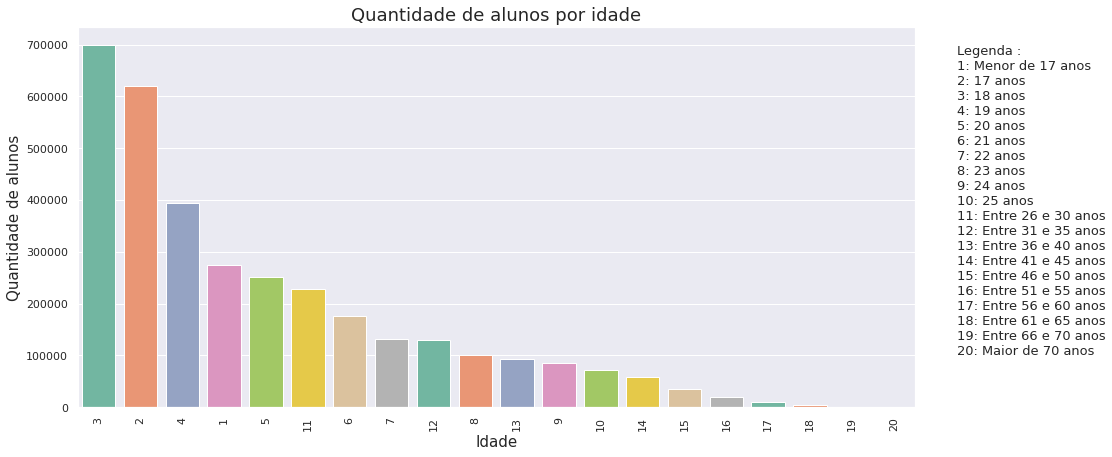

In [50]:
legenda_idade = { 'Legenda ' : ' ',
                   '1':'Menor de 17 anos',
                   '2':'17 anos',
                   '3':'18 anos',
                   '4':'19 anos',
                   '5':'20 anos',
                   '6':'21 anos',
                   '7':'22 anos',
                   '8':'23 anos',
                    '9':'24 anos',
                    '10':'25 anos',
                    '11':'Entre 26 e 30 anos',
                    '12':'Entre 31 e 35 anos',
                    '13':'Entre 36 e 40 anos',
                    '14':'Entre 41 e 45 anos',
                    '15':'Entre 46 e 50 anos',
                    '16':'Entre 51 e 55 anos',
                    '17':'Entre 56 e 60 anos',
                    '18':'Entre 61 e 65 anos',
                    '19':'Entre 66 e 70 anos',
                    '20':'Maior de 70 anos'}

legenda_idade_txt = ''
for key,value in legenda_idade.items():
    legenda_idade_txt = legenda_idade_txt + "{key}: {value}\n".format(key=key, value=value)


#Configurações de estilo
sns.set_style('darkgrid')
sns.set_context('notebook')

#Configurações de visualização
fig = plt.figure(figsize=(15,7))
plt.xticks(rotation=90)

#Gerando o gráfico
ax = sns.countplot(data=df, 
                 x='TP_FAIXA_ETARIA',  
                 order=df['TP_FAIXA_ETARIA'].value_counts().index,
                 palette ='Set2',
                )
ax.set_title('Quantidade de alunos por idade', fontsize=18)
ax.set_xlabel('Idade', fontsize=15)
ax.set_ylabel('Quantidade de alunos', fontsize=15)    
ax.text(1.05,0.10, legenda_idade_txt, transform=ax.transAxes, fontsize=13)

print('A maioria dos candidatos tem idade até 20 anos.')

A maioria dos candidatos é do sexo feminino.


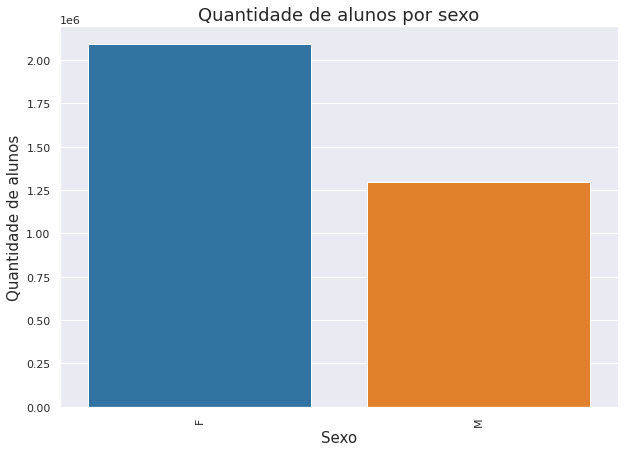

In [52]:
#Configurações de estilo
sns.set_style('darkgrid')
sns.set_context('notebook')

#Configurações de visualização
fig = plt.figure(figsize=(10,7))
plt.xticks(rotation=90)

#Gerando o gráfico
ax = sns.countplot(data=df, 
                 x='TP_SEXO',  
                 order=df['TP_SEXO'].value_counts().index,
                 palette ='tab10',
                )
ax.set_title('Quantidade de alunos por sexo', fontsize=18)
ax.set_xlabel('Sexo', fontsize=15)
ax.set_ylabel('Quantidade de alunos', fontsize=15)    

print('A maioria dos candidatos é do sexo feminino.')

A maioria dos candidatos é da raça / cor .


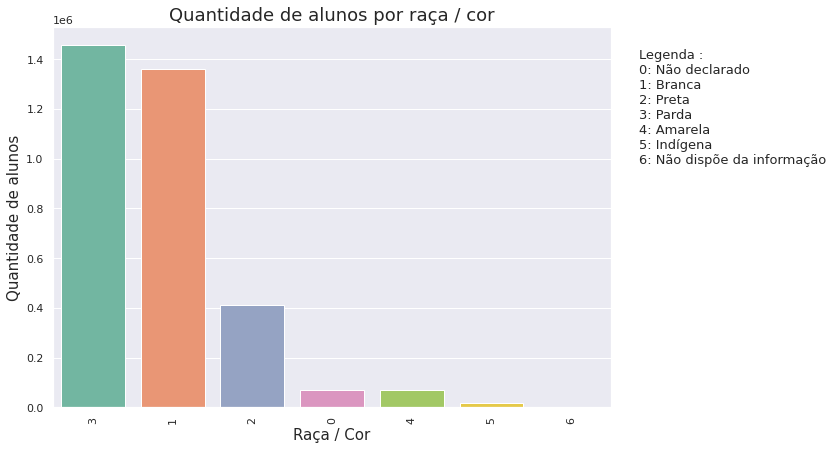

In [62]:
legenda_racacor = { 'Legenda ' : ' ',
                   '0':'Não declarado',
                   '1':'Branca',
                   '2':'Preta',
                   '3':'Parda',
                   '4':'Amarela',
                   '5':'Indígena',
                   '6':'Não dispõe da informação'}

legenda_racacor_txt = ''
for key,value in legenda_racacor.items():
    legenda_racacor_txt = legenda_racacor_txt + "{key}: {value}\n".format(key=key, value=value)

#Configurações de estilo
sns.set_style('darkgrid')
sns.set_context('notebook')

#Configurações de visualização
fig = plt.figure(figsize=(10,7))
plt.xticks(rotation=90)

#Gerando o gráfico
ax = sns.countplot(data=df, 
                 x='TP_COR_RACA',  
                 order=df['TP_COR_RACA'].value_counts().index,
                 palette ='Set2',
                )
ax.set_title('Quantidade de alunos por raça / cor', fontsize=18)
ax.set_xlabel('Raça / Cor', fontsize=15)
ax.set_ylabel('Quantidade de alunos', fontsize=15)  
ax.text(1.05,0.60, legenda_racacor_txt, transform=ax.transAxes, fontsize=13)

print('A maioria dos candidatos é da raça / cor .')